## DEMO: Solving QM problems with Variational method

In [1]:
import numpy as np
import scipy as sp
from scipy.linalg import eigh
import matplotlib.pyplot as plt

### Harmonic Oscillator 

In [2]:
def psi0(x):
    '''Normalized ground state wavefunction of harmonic oscillator
     The following units used; hbar=1, mu=1, k=1
     '''

    return np.pi**(-0.25)*np.exp(-0.5 * x **2 )


def basis_functions(x, n):
    '''Define any 1D trial function you like.
    n: is a parameter that defines basis functions in a linear combination 
    e.g c_1 f_1+c_2f_2+...'''

    return np.exp(-n*x**4)

### Write functions to compute matrix elements 

In [3]:
# Define the potential energy function for your quantum system
def PE(f, x):
    '''Potential energy with the following units used; hbar=1, mu=1, k=1
    '''

    return 0.5 * x**2 * f  # Harmonic oscillator potential as an example

def KE(f, dx):
    '''Kinetic energy operator, with the following units used; hbar=1, mu=1, k=1
    f: a 1D array of length N
    dx: spacing between points
    '''

    dfdx   = np.gradient(f, dx)
    df2dx2 = np.gradient(dfdx, dx)

    return -0.5*df2dx2

### Test for numerical accuracy

In [7]:
#Check normalization, should be 1
x = np.linspace(-10, 10, 10000)
dx=x[1]-x[0]

np.trapz(psi0(x)**2, x=x)

1.0

In [6]:
#Check ground energy 1/2 hbar omega = 1/2 (because h=1 and omega=1 because k=1, mu=1)
fHf = psi0(x) * ( KE(psi0(x), dx)+ PE(psi0(x), x) )

np.trapz(fHf, x=x)

0.49999949990084436

### Solve eigenvalue problem

In [8]:
# Define the number of basis functions and the range of x
num_basis_functions = 10

# Compute the overlap matrix and Hamiltonian matrix
overlap_matrix = np.zeros((num_basis_functions, num_basis_functions))
hamiltonian_matrix = np.zeros((num_basis_functions, num_basis_functions))

for i in range(num_basis_functions):
    for j in range(num_basis_functions):

        fi, fj = basis_functions(x, i), basis_functions(x, j)

        overlap_matrix[i, j]     = np.trapz(fi * fj, x=x)

        hamiltonian_matrix[i, j] = np.trapz(fi * ( KE(fj, dx)+ PE(fj, x) ), x=x)

# Diagonalize the matrices to find eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(hamiltonian_matrix, overlap_matrix)

# Find the ground-state energy (lowest eigenvalue) and corresponding eigenfunction
ground_state_energy = eigenvalues[0]
ground_state_wavefunction = eigenvectors[:, 0]

print(f"Ground-State Energy: {ground_state_energy}")
print(f"Ground-State Wavefunction Coefficients: {ground_state_wavefunction}")

Ground-State Energy: 0.6548831175123827
Ground-State Wavefunction Coefficients: [-2.12550098e-03 -6.16906835e+00  7.29002966e+01 -5.13399936e+02
  2.10788059e+03 -5.25746977e+03  8.07103179e+03 -7.44534509e+03
  3.78351758e+03 -8.13758627e+02]


### Visualize eigenvectors

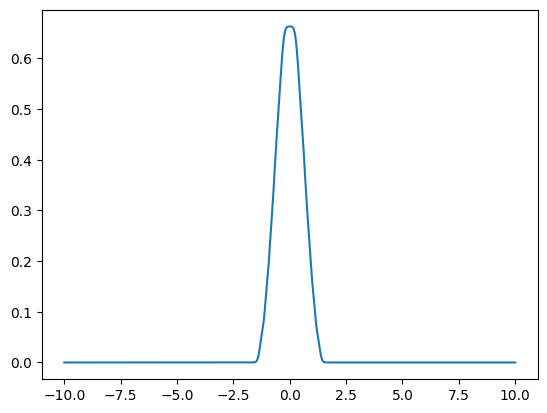

In [20]:
psi = 0 # trial function
k   = 0 # eigenvector 

for i in range(num_basis_functions):

    psi += eigenvectors[:, k][i] * basis_functions(x, i)

plt.plot(x, psi**2)